In [63]:
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt
brats_train_path = "C:/Users/user/Downloads/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/train/"
brats_val_path = "C:/Users/user/Downloads/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/val/"
brats_test_path = "C:/Users/user/Downloads/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/test/"

In [64]:
images = os.listdir(brats_val_path)
images[0]

'BraTS-GLI-00006-000'

In [65]:
img_path = os.path.join(brats_val_path, images[0])
ds = {}
for nil_name in os.listdir(img_path):
    img_type = nil_name.split('-')[-1].split('.')[0]
    if(img_type != 'seg'):
        ds[img_type] = nib.load(os.path.join(img_path, nil_name)).get_fdata()
    else: mask = nib.load(os.path.join(img_path, nil_name)).get_fdata()

In [60]:
_img = []
for nil_name in os.listdir(img_path):
    img_type = nil_name.split('-')[-1].split('.')[0]
    if img_type == 'seg':
        mask = nib.load(os.path.join(img_path, nil_name)).get_fdata()
    else:
        _img.append(nib.load(os.path.join(img_path, nil_name)).get_fdata())
image = np.stack(_img)

In [61]:
image.shape, mask.shape

((4, 240, 240, 155), (240, 240, 155))

0.0 0.0


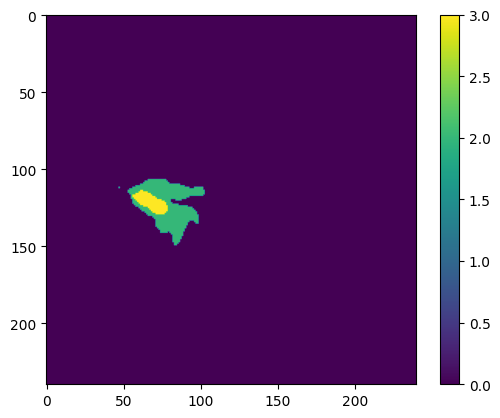

In [51]:
print(mask[:,:,50].min(), mask[:,:,40].max())
plt.imshow(mask[:,:,50])
plt.colorbar()

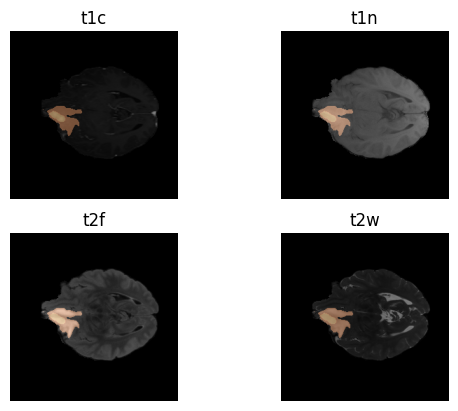

In [49]:
i = 1
slide2show = 50
for key in ds:
    plt.subplot(2,2,i)
    plt.imshow(ds[key][:,:,slide2show], cmap='gray')
    plt.imshow(mask[:,:,slide2show], cmap='copper', alpha=0.5)
    plt.title(key)
    plt.axis('off')
    i+=1

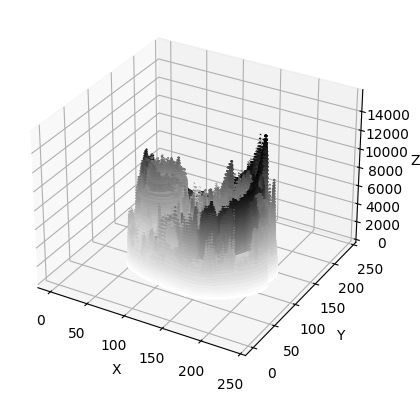

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 155장의 이미지를 불러와서 3D 볼륨으로 변환
volume_data = np.transpose(ds['t1c'], (2,0,1))  # 예시 데이터, 실제 MRI 이미지로 대체해야 합니다.

# 시각화를 위한 3D 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D 볼륨을 슬라이스해서 플롯에 추가
for i in range(volume_data.shape[0]):
    x = np.arange(volume_data.shape[1])
    y = np.arange(volume_data.shape[2])
    X, Y = np.meshgrid(x, y)
    ax.contour3D(X, Y, volume_data[i], 50, cmap='binary')  # 등고선 플롯 사용
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.show()
